# 房价预测

In [21]:
import numpy as np
import pandas as pd

In [22]:
train_df = pd.read_csv('input/train.csv', index_col=0)
test_df = pd.read_csv('input/test.csv', index_col=0)

In [23]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000254021D4F60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002540320A2B0>]], dtype=object)

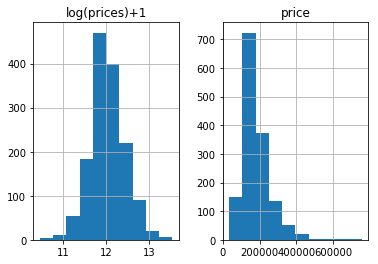

In [25]:
%matplotlib inline
prices = pd.DataFrame({"price":train_df["SalePrice"],"log(prices)+1":np.log1p(train_df["SalePrice"])})
prices.hist()

In [26]:
y_train = np.log1p(train_df.pop('SalePrice'))

In [27]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [28]:
all_df = pd.concat((train_df,test_df),axis =0)

In [29]:
all_df.shape

(2919, 79)

In [30]:
y_train.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

In [31]:
all_df['MSSubClass'].dtypes

dtype('int64')

In [32]:
all_df['MSSubClass'] = all_df['MSSubClass'].astype(str)

In [33]:
all_df['MSSubClass'].dtypes

dtype('O')

In [37]:
all_df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [39]:
pd.get_dummies(all_df['MSSubClass'],prefix="MSSubClass").head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [40]:
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [43]:
all_dummy_df.isnull().sum().sort_values(ascending=False).head(10) #false 代表是缺省值，如为true。则为没有缺省值的

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
BsmtFinSF2        1
GarageCars        1
TotalBsmtSF       1
BsmtUnfSF         1
GarageArea        1
dtype: int64

In [46]:
mean_df = all_dummy_df.mean()
mean_df.head()

LotFrontage       69.305795
LotArea        10168.114080
OverallQual        6.089072
OverallCond        5.564577
YearBuilt       1971.312778
dtype: float64

In [48]:
all_dummy_df = all_dummy_df.fillna(mean_df)
all_dummy_df.isnull().sum().sum()

0

标准化数据，由于regression比较傲娇

In [50]:
numeric_df = all_df.columns[all_df.dtypes !='object']

In [51]:
numeric_df

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [52]:
numeric_col_means = all_dummy_df.loc[:, numeric_df].mean()
numeric_col_std = all_dummy_df.loc[:, numeric_df].std()
all_dummy_df.loc[:, numeric_df] = (all_dummy_df.loc[:, numeric_df] - numeric_col_means) / numeric_col_std

In [53]:
all_dummy_df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,-2.020329e-01,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.525112,0.580807,-0.293080,-0.934702,...,0,0,0,1,0,0,0,0,1,0
2,5.017845e-01,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.572152,1.177910,-0.293080,-0.629788,...,0,0,0,1,0,0,0,0,1,0
3,-6.126943e-02,0.137173,0.646073,-0.507197,0.980053,0.848819,0.334770,0.097856,-0.293080,-0.288467,...,0,0,0,1,0,0,0,0,1,0
4,-4.366387e-01,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.572152,-0.494856,-0.293080,-0.047266,...,0,0,0,1,1,0,0,0,0,0
5,6.894691e-01,0.518814,1.355319,-0.507197,0.947040,0.753100,1.387248,0.468851,-0.293080,-0.161040,...,0,0,0,1,0,0,0,0,1,0
6,7.363903e-01,0.500430,-0.772420,-0.507197,0.715952,0.513801,-0.572152,0.637883,-0.293080,-1.130393,...,0,0,0,1,0,0,0,0,1,0
7,2.671787e-01,-0.010665,1.355319,-0.507197,1.079091,0.992399,0.469129,2.036246,-0.293080,-0.554698,...,0,0,0,1,0,0,0,0,1,0
8,-1.800332e-14,0.027119,0.646073,0.391170,0.055700,-0.539116,0.771437,0.916678,-0.103928,-0.784521,...,0,0,0,1,0,0,0,0,1,0
9,-8.589292e-01,-0.513264,0.646073,-0.507197,-1.330831,-1.639892,-0.572152,-0.969026,-0.293080,0.890230,...,0,0,0,1,1,0,0,0,0,0


In [56]:
train_df.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460],
           dtype='int64', name='Id', length=1460)

In [57]:
train_dummy_df = all_dummy_df.loc[train_df.index]
test_dummy_df = all_dummy_df.loc[test_df.index]

In [58]:
train_dummy_df.shape

(1460, 303)

In [59]:
from sklearn.linear_model import  Ridge
from sklearn.model_selection import cross_val_score

In [60]:
X_train = train_dummy_df.values
X_test = test_dummy_df.values

In [61]:
alphas = np.logspace(-3, 2, 50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

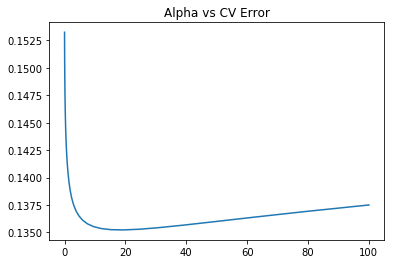

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error");

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_fea in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_fea)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

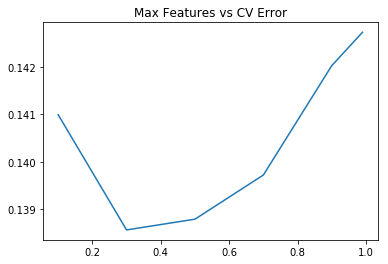

In [69]:
plt.plot(max_features, test_scores)
plt.title("Max Features vs CV Error");

In [70]:
ridge = Ridge(alpha=15)
rondomforest =RandomForestRegressor(n_estimators=500,max_features=0.3)
ridge.fit(X_train,y_tarin)
rondomforest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [72]:
y_ridge = np.expm1(ridge.predict(X_test))
y_tf = np.expm1(rondomforest.predict(X_test))

In [73]:
y_final =( y_ridge + y_tf)/2

In [74]:
submission_df = pd.DataFrame(data= {'Id' : test_df.index, 'SalePrice': y_final})

In [76]:
submission_df.head(10)

,Id,SalePrice
0,1461,119405.789261
1,1462,151326.934487
2,1463,174261.035646
3,1464,189480.210121
4,1465,195789.424941
5,1466,175688.691391
6,1467,177045.720378
7,1468,168793.713243
8,1469,184372.986025
9,1470,122567.809747
